In [1]:
import pandas as pd
import numpy as np
import re 

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_excel(r"C:\Users\ZULFIKAR\Downloads\Compressed\Dataset\Data\Data1.xlsx")
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Mar 29 12:13:21 +0000 2024,1773684872332120064,𝗦𝗘𝗟𝗔𝗠𝗔𝗧 𝗗𝗔𝗧𝗔𝗡𝗚 𝗖𝗔𝗟𝗢𝗡 𝗠𝗔𝗛𝗔𝗦𝗜𝗦𝗪𝗔 𝗞𝗜𝗣 𝗞𝗨𝗟𝗜𝗔𝗛 𝗨𝗡𝗬 ...,0,0,0,1,in,4087795639,1773684872332120064,fomuny_,https://twitter.com/fomuny_/status/17736848723...
1,Fri Mar 29 12:06:35 +0000 2024,1773683166743506944,WELCOME TPB FSRD ITB 2024!! #snbp2024 #snbp #f...,0,0,0,0,in,1594301197858483968,1773683166743506944,yuzhongsheesh,https://twitter.com/yuzhongsheesh/status/17736...
2,Fri Mar 29 10:12:25 +0000 2024,1773654435601735936,"guys aku bingung bangetttt aku lulus snbp, tap...",0,0,0,0,in,1740555531193105920,1773654435601735936,icecream_wasabi,https://twitter.com/icecream_wasabi/status/177...
3,Fri Mar 29 09:57:45 +0000 2024,1773650747227282944,Drop skor utbk yang lolos akutansi upn veteran...,0,0,0,0,in,1343741550040207104,1773650747227282944,cansamoy,https://twitter.com/cansamoy/status/1773650747...
4,Fri Mar 29 09:41:23 +0000 2024,1773646629658096128,"Temen-temen maaf banget, kalau ada waktu boleh...",0,3,0,0,in,1014579488573668992,1773646629658096128,0410archives,https://twitter.com/0410archives/status/177364...


In [3]:
df.describe()

,id_str,quote_count,reply_count,retweet_count,favorite_count,user_id_str,conversation_id_str
count,1.365000e+03,1365.000000,1365.000000,1365.000000,1365.000000,1.365000e+03,1.365000e+03
mean,1.760507e+18,0.753114,1.827106,15.723077,58.521612,1.285907e+18,1.760417e+18
std,1.842754e+16,6.315844,10.160414,114.232063,357.768791,5.143869e+17,1.863647e+16
min,1.613859e+18,0.000000,0.000000,0.000000,0.000000,2.694085e+07,1.613857e+18
25%,1.750850e+18,0.000000,0.000000,0.000000,0.000000,1.256801e+18,1.750746e+18
50%,1.772374e+18,0.000000,0.000000,0.000000,0.000000,1.451163e+18,1.772362e+18
75%,1.772596e+18,0.000000,1.000000,0.000000,2.000000,1.626758e+18,1.772595e+18
max,1.773685e+18,172.000000,159.000000,2703.000000,7694.000000,1.765648e+18,1.773685e+18


In [4]:
df.shape

(1365, 12)

In [5]:
df = df.drop_duplicates(subset=['full_text'])

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64

In [9]:
df = df[['full_text','username','created_at']]
df

,full_text,username,created_at
0,𝗦𝗘𝗟𝗔𝗠𝗔𝗧 𝗗𝗔𝗧𝗔𝗡𝗚 𝗖𝗔𝗟𝗢𝗡 𝗠𝗔𝗛𝗔𝗦𝗜𝗦𝗪𝗔 𝗞𝗜𝗣 𝗞𝗨𝗟𝗜𝗔𝗛 𝗨𝗡𝗬 ...,fomuny_,Fri Mar 29 12:13:21 +0000 2024
1,WELCOME TPB FSRD ITB 2024!! #snbp2024 #snbp #f...,yuzhongsheesh,Fri Mar 29 12:06:35 +0000 2024
2,"guys aku bingung bangetttt aku lulus snbp, tap...",icecream_wasabi,Fri Mar 29 10:12:25 +0000 2024
3,Drop skor utbk yang lolos akutansi upn veteran...,cansamoy,Fri Mar 29 09:57:45 +0000 2024
4,"Temen-temen maaf banget, kalau ada waktu boleh...",0410archives,Fri Mar 29 09:41:23 +0000 2024
...,...,...,...
1360,Buku persiapan UTBK SNBT 2024📚 | ugm | ui | it...,bysalasa,Thu Jul 27 10:57:19 +0000 2023
1361,aku jual buku wangsit soshum up 50k ya semuany...,statisct,Fri Jun 30 08:46:05 +0000 2023
1362,#studytwt #snbp2024 Temen-temen yang pengen am...,accrilalearning,Thu Apr 20 04:12:11 +0000 2023
1363,bismillah tahun depan bisa keterima unj #snbp2024,rahayuayudni,Wed Mar 29 14:51:26 +0000 2023


In [10]:
## Menghapus karakter khusus yang ada didalam dataset kita sepert @Mentions, #Hastag, Url dan lain-lain
def clean_twitter_text(text):
    # Menghapus @Mentions, #Hashtags, dan URL yang valid
    text = re.sub(r"([@#][A-Za-z0-9]+)|(https?://\S+)|(www\.\S+)", " ", text)
    # Menghapus karakter tunggal
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    # Menghapus angka
    text = re.sub(r"\d+", "", text)
    # Menghapus tanda baca di sekitar kata
    text = re.sub(r'(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)
    # Menghapus kata 'RT'
    text = re.sub(r'RT', " ", text)
    # Menghapus karakter non-ASCII
    text = re.sub(r'[\U00010000-\U0010ffff]', "", text)
    # Menghapus karakter non-ASCII tambahan
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Menghapus beberapa karakter tertentu
    text = text.replace('..', " ")
    text = text.replace('-', " ")
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")

    # Menghapus URL yang tersisa setelah pembersihan sebelumnya
    text = re.sub(r"(https?://\S+)|(www\.\S+)", "", text)
    # Menghapus tanda baca berlebihan seperti tanda seru (!) (,) dan titik (.)
    text = re.sub(r'!+', ' ', text)
    text = re.sub(r'\.+', ' ', text)
    text = re.sub(r'\?+', ' ', text)
    text = re.sub(r"https?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)
    # Menghapus spasi ganda
    text = re.sub(r'\s+', ' ', text)
    # Menghapus karakter |
    text = re.sub(r'\|', '', text)
    # Menghapus koma
    text = re.sub(r',', '', text)

    return text
    
    return text

# Apply the cleaning function to the 'full_text' column
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [11]:
## Ubah huruf besar menjadi huruf kecil semua
df['full_text'] = df['full_text'].str.lower()
df.head(10)

,full_text,username,created_at
0,simak persyaratan untuk masuk grup whatsapp,fomuny_,Fri Mar 29 12:13:21 +0000 2024
1,welcome tpb fsrd itb,yuzhongsheesh,Fri Mar 29 12:06:35 +0000 2024
2,guys aku bingung bangetttt aku lulus snbp tap...,icecream_wasabi,Fri Mar 29 10:12:25 +0000 2024
3,drop skor utbk yang lolos akutansi upn veteran...,cansamoy,Fri Mar 29 09:57:45 +0000 2024
4,temen temen maaf banget kalau ada waktu boleh...,0410archives,Fri Mar 29 09:41:23 +0000 2024
5,hai yang lolos snbp kemarin jurusan teknologi...,ilustracsi,Fri Mar 29 09:29:31 +0000 2024
6,webinar nasional gratis tema: intelektual mud...,Fangsline,Fri Mar 29 08:44:02 +0000 2024
7,late to the party tapi ini portofolio ku yang ...,moonsayangpara,Fri Mar 29 07:29:35 +0000 2024
8,selamat kepada peserta didik sma doa bangsa bi...,FKDB_2005,Fri Mar 29 06:36:56 +0000 2024
9,open joki ujian mandiri ptn slot terbatas book...,JokiIN_PTN,Fri Mar 29 05:35:03 +0000 2024


In [12]:
print(df['full_text'])

0            simak persyaratan untuk masuk grup whatsapp 
1                                   welcome tpb fsrd itb 
2       guys aku bingung bangetttt aku lulus snbp  tap...
3       drop skor utbk yang lolos akutansi upn veteran...
4       temen temen maaf banget  kalau ada waktu boleh...
                              ...                        
1360    buku persiapan utbk snbt  ugm  ui  itb  sbmptn...
1361    aku jual buku wangsit soshum up k ya semuanya ...
1362     temen temen yang pengen ambis ngerjar nilai r...
1363             bismillah tahun depan bisa keterima unj 
1364    &amp ngarepgakngarep arya dapat kuota sekolah ...
Name: full_text, Length: 1345, dtype: object


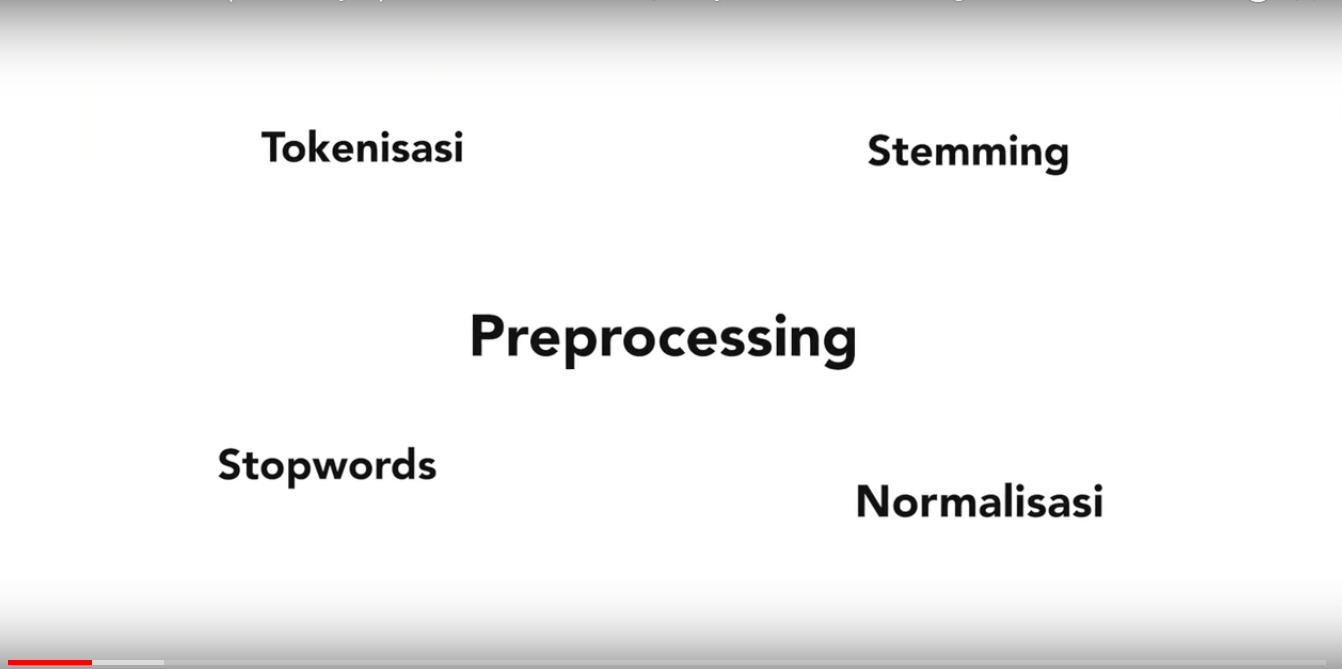

## Preprocessing

In [15]:
dataset = df

In [16]:
dataset.head()

,full_text,username,created_at
0,simak persyaratan untuk masuk grup whatsapp,fomuny_,Fri Mar 29 12:13:21 +0000 2024
1,welcome tpb fsrd itb,yuzhongsheesh,Fri Mar 29 12:06:35 +0000 2024
2,guys aku bingung bangetttt aku lulus snbp tap...,icecream_wasabi,Fri Mar 29 10:12:25 +0000 2024
3,drop skor utbk yang lolos akutansi upn veteran...,cansamoy,Fri Mar 29 09:57:45 +0000 2024
4,temen temen maaf banget kalau ada waktu boleh...,0410archives,Fri Mar 29 09:41:23 +0000 2024


In [17]:
print(dataset.tail(10)['full_text'])

1355          yuk ikut workshop khusus buat anak sma yaa 
1356    'ayo curi start sekarang juga' buat yg serius ...
1357    kelas angkatan / sudah nyiapin apa aja nih jan...
1358    yakin nih gk kepengen kuliah tanpa tes daftar ...
1359    halloo  buat kalian yang kelas dan lagi nyari ...
1360    buku persiapan utbk snbt  ugm  ui  itb  sbmptn...
1361    aku jual buku wangsit soshum up k ya semuanya ...
1362     temen temen yang pengen ambis ngerjar nilai r...
1363             bismillah tahun depan bisa keterima unj 
1364    &amp ngarepgakngarep arya dapat kuota sekolah ...
Name: full_text, dtype: object


<h1>Preprocesing</h1>

### 1. Normalisasi

In [18]:
nor = {
    "yg": "yang",
    "bntar": "bentar",
    "ptn": "perguruan tinggi negeri",
    "pts": "perguruan tinggi swasta",
    "gak": "tidak",
    "unj": "universitas negeri jember",
    "soshum": "sosial hukum",
    "bgt": "banget",
    "lg": "lagi",
    "udah": "sudah",
    "gw": "saya",
    "lu": "kamu",
    "emang": "memang",
    "pmb": "penerimaan mahasiswa baru",
    "itb": "institut teknologi bandung",
    "ugm": "universitas gajah mada",
    "ui": "universitas indonesia",
    "ipb": "institut pertanian bogor",
    "uny": "universitas negeri yogyakarta",
    "unm": "universitas negeri medan",
    "unhas": "universitas hassanudin",
    "unp": "universitas negeri padang",
    "unsoed": "universitas jendral soedirman",
    "um": "universitas negeri malang",
    "unsri": "universitas sriwijaya",
    "ub": "universitas brawijaya",
    "undip": "universitas diponegoro",
    "upi": "universitas pendidikan indonesia",
    "unpad": "universitas padjajaran",
    "unnes": "universitas negeri semarang",
    "unj": "universitas negeri jakarta",
    "uns": "universitas sebelas maret",
    "its": "institut teknologi sepuluh november",
    "pnj": "politeknik negeri jakarta",
    "polinema": "politeknik negeri malang",
    "polines": "politeknik negeri semarang",
    "polban": "politeknik negeri bandung",
    "polije": "politeknik negeri jember",
    "pnm": "politeknik negeri madiun",
    "pens": "politeknik elektronika negeri surabaya",
    "ppns": "politeknik perkapalan negeri surabaya",
    'universitas brawijayaungi' :  'universitas brawijaya',
    'universitas brawijayaungiuniversitas': 'universitas brawijaya',
    'universitas brawijayahanallah': 'universitas brawijaya',
    'universitas indonesias' : 'universitas indonesia',
    'universitas brawijayahanallah' : 'universitas brawijaya',
    'universitas brawijayaantuu' : 'universitas brawijaya',
    'universitas brawijayates' : 'universitas brawijaya',
    'universitas brawijayascribe' : 'universitas brawijaya',
    'universitas indonesian' : 'universitas brawijaya',
    'universitas sebelas' : 'universitas sebelas maret',
    'upn veteran' : 'unviersitas pembangunan veteran' 
}

In [19]:
def normalisation(str_text):
    for i in nor:
        str_text = str_text.replace(i, nor[i])
    return str_text
dataset['full_text'] = df['full_text'].apply(lambda x: normalisation(x))
dataset

,full_text,username,created_at
0,simak persyaratan untuk masuk grup whatsapp,fomuny_,Fri Mar 29 12:13:21 +0000 2024
1,welcome tpb fsrd institut teknologi bandung,yuzhongsheesh,Fri Mar 29 12:06:35 +0000 2024
2,guys aku bingung bangetttt aku kamukamus snbp ...,icecream_wasabi,Fri Mar 29 10:12:25 +0000 2024
3,drop skor utbk yang lolos akutansi unviersitas...,cansamoy,Fri Mar 29 09:57:45 +0000 2024
4,temen temen maaf banget kalau ada waktu boleh...,0410archives,Fri Mar 29 09:41:23 +0000 2024
...,...,...,...
1360,buku persiapan utbk snbt universitas gajah ma...,bysalasa,Thu Jul 27 10:57:19 +0000 2023
1361,aku jual buku wangsit sosial hukuniversitas ne...,statisct,Fri Jun 30 08:46:05 +0000 2023
1362,temen temen yang pengen ambis ngerjar nilai r...,accrilalearning,Thu Apr 20 04:12:11 +0000 2023
1363,bismillah tahun depan bisa keterima universita...,rahayuayudni,Wed Mar 29 14:51:26 +0000 2023


In [20]:
print(dataset.tail(10)['full_text'])

1355          yuk ikut workshop khusus buat anak sma yaa 
1356    'ayo curi start sekarang juga' buat yang seriu...
1357    kelas angkatan / ssudah nyiapin apa aja nih ja...
1358    yakin nih gk kepengen kuliah tanpa tes daftar ...
1359    halloo  buat kalian yang kelas dan lagi nyari ...
1360    buku persiapan utbk snbt  universitas gajah ma...
1361    aku jual buku wangsit sosial hukuniversitas ne...
1362     temen temen yang pengen ambis ngerjar nilai r...
1363    bismillah tahun depan bisa keterima universita...
1364    &amp ngareptidakngarep arya dapat kuota sekola...
Name: full_text, dtype: object


In [21]:
dataset

,full_text,username,created_at
0,simak persyaratan untuk masuk grup whatsapp,fomuny_,Fri Mar 29 12:13:21 +0000 2024
1,welcome tpb fsrd institut teknologi bandung,yuzhongsheesh,Fri Mar 29 12:06:35 +0000 2024
2,guys aku bingung bangetttt aku kamukamus snbp ...,icecream_wasabi,Fri Mar 29 10:12:25 +0000 2024
3,drop skor utbk yang lolos akutansi unviersitas...,cansamoy,Fri Mar 29 09:57:45 +0000 2024
4,temen temen maaf banget kalau ada waktu boleh...,0410archives,Fri Mar 29 09:41:23 +0000 2024
...,...,...,...
1360,buku persiapan utbk snbt universitas gajah ma...,bysalasa,Thu Jul 27 10:57:19 +0000 2023
1361,aku jual buku wangsit sosial hukuniversitas ne...,statisct,Fri Jun 30 08:46:05 +0000 2023
1362,temen temen yang pengen ambis ngerjar nilai r...,accrilalearning,Thu Apr 20 04:12:11 +0000 2023
1363,bismillah tahun depan bisa keterima universita...,rahayuayudni,Wed Mar 29 14:51:26 +0000 2023


### 2. Stopword

In [22]:
## Menggunakan library sastrawi: from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words =["tidak", "guys"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,simak persyaratan masuk grup whatsapp,fomuny_,Fri Mar 29 12:13:21 +0000 2024
1,welcome tpb fsrd institut teknologi bandung,yuzhongsheesh,Fri Mar 29 12:06:35 +0000 2024
2,aku bingung bangetttt aku kamukamus snbp ortu...,icecream_wasabi,Fri Mar 29 10:12:25 +0000 2024
3,drop skor utbk lolos akutansi unviersitas pemb...,cansamoy,Fri Mar 29 09:57:45 +0000 2024
4,temen temen maaf banget kalau waktu tolong ba...,0410archives,Fri Mar 29 09:41:23 +0000 2024


In [23]:
print(dataset.tail(10)['full_text'])

1355          yuk ikut workshop khusus buat anak sma yaa 
1356    'ayo curi start sekarang juga' buat serius pen...
1357    kelas angkatan / ssudah nyiapin apa aja nih ja...
1358    yakin nih gk kepengen kuliah tes daftar kuliah...
1359    halloo  buat kalian kelas lagi nyari temen bel...
1360    buku persiapan utbk snbt  universitas gajah ma...
1361    aku jual buku wangsit sosial hukuniversitas ne...
1362     temen temen pengen ambis ngerjar nilai rapot ...
1363    bismillah tahun depan keterima universitas neg...
1364    &amp ngareptidakngarep arya kuota sekolah &amp...
Name: full_text, dtype: object


### 3. Tokenize

In [24]:
tokenize = dataset['full_text'].apply(lambda x:x.split())
tokenize.tail()

1360    [buku, persiapan, utbk, snbt, universitas, gaj...
1361    [aku, jual, buku, wangsit, sosial, hukuniversi...
1362    [temen, temen, pengen, ambis, ngerjar, nilai, ...
1363    [bismillah, tahun, depan, keterima, universita...
1364    [&amp, ngareptidakngarep, arya, kuota, sekolah...
Name: full_text, dtype: object

<Figure size 1000x600 with 0 Axes>

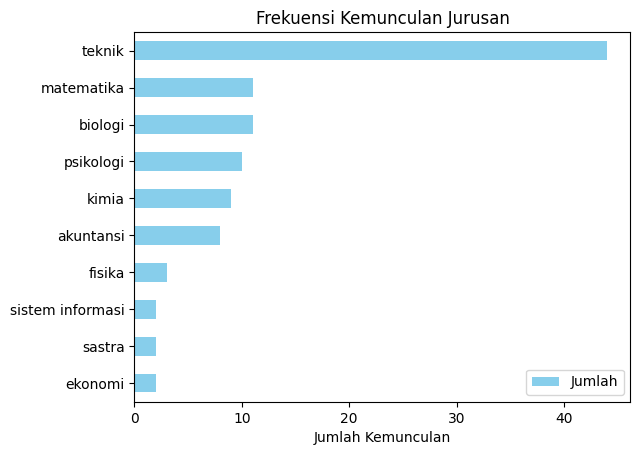

In [26]:
# Definisikan pola regex untuk nama jurusan (misal: "teknik", "hukum", "psikologi", dst.)
jurusan_pattern = r'(teknik|hukum|psikologi|ekonomi|sastra|biologi|fisika|kimia|matematika|akuntansi|sistem informasi)\s+\w+'

# Ambil kolom teks yang ingin Anda analisis
kolom_teks = df["full_text"]  # Ganti "nama_kolom_teks" dengan nama kolom teks dalam dataset Anda

# Gabungkan semua teks menjadi satu teks panjang
teks_panjang = " ".join(kolom_teks)

# Cari kemunculan nama jurusan menggunakan regex
jurusan_matches = re.findall(jurusan_pattern, teks_panjang.lower())

# Hitung frekuensi kemunculan jurusan menggunakan Counter
frekuensi_jurusan = Counter(jurusan_matches)

# Konversi Counter menjadi DataFrame
jurusan_counts = pd.DataFrame.from_dict(frekuensi_jurusan, orient='index', columns=['Jumlah'])

# Urutkan berdasarkan jumlah kemunculan
jurusan_counts = jurusan_counts.sort_values(by='Jumlah', ascending=False)

# Buat plot
plt.figure(figsize=(10,6))
jurusan_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Jumlah Kemunculan')
plt.title('Frekuensi Kemunculan Jurusan')
plt.gca().invert_yaxis()  # supaya urutan dari atas ke bawah sesuai urutan di dataframe
plt.show()

### 4. Stemming

In [27]:
# Mengubah kata imbuhan menjadi kata dasar 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenize = tokenize.apply(stemming)

tokenize.to_csv(r"C:\Users\ZULFIKAR\Downloads\Compressed\Dataset\Data\Data_stemming.csv", index=False)
data = pd.read_csv(r"C:\Users\ZULFIKAR\Downloads\Compressed\Dataset\Data\Data_stemming.csv", encoding='latin1')

simak syarat masuk grup whatsapp
welcome tpb fsrd institut teknologi bandung
aku bingung bangetttt aku kamukamus snbp ortu ku ga puniversitas negeri yogyakartaa uang buat ongkos pesawat biaya bulan kost tiap hari aku nang mikirin semua masa depan kayak gimana yang puniversitas negeri yogyakartaa saran
drop skor utbk lolos akutansi unviersitas bangun veteran yogyakarta donggg butuh banget buat adekk
temen temen maaf banget kalau waktu tolong bantu kuesioner aku buat tugas kuliah tentu cuniversitas negeri malanga lahir aja kok kok barter drop linknya aja hihii
hai lolos snbp kemarin jurus teknologi pangan institut tani bogor tau ga rata rata nya berapa makas lt
webinar nasional gratis tema intelektual muda karya  asah kreativitas desain canva sabtu maret selesai buka universitas negeri malanguniversitas negeri malang link daftar
late to the party ini portofolio ku tolak dkv isi yangy hehe memang banyak banget minus sih
selamat serta didik sma doa bangsa bina fkdb yppdb telah terima guru 

In [28]:
data = pd.read_csv(r"C:\Users\# Pola regex untuk kata kunci yang menunjukkan lolos
kata_kunci_lolos = r'(lolos|ketrima|lulus|diterima|keterima|biru)'

# Pola regex untuk kata kunci yang menunjukkan tidak lolos
kata_kunci_tidak_lolos = r'(merah|belum beruntung|menyala abangkuh|merah merona|belum rezeki)'

# Tokenisasi teks
tokens = re.findall(r'\b\w+\b', teks_contoh.lower())

# Stemming kata dalam tokens
# (Anda perlu implementasi stemming sesuai dengan library atau algoritma yang Anda gunakan)
# Di sini saya akan menggunakan token aslinya untuk kemudahan.
stemmed_tokens = tokens

# Hitung kemunculan kata kunci untuk lolos dan tidak lolos
lolos_count = sum(1 for token in stemmed_tokens if re.match(kata_kunci_lolos, token))
tidak_lolos_count = sum(1 for token in stemmed_tokens if re.match(kata_kunci_tidak_lolos, token))

# Tampilkan hasil
print("Jumlah kata kunci untuk lolos:", lolos_count)
print("Jumlah kata kunci untuk tidak lolos:", tidak_lolos_count)ZULFIKAR\Downloads\Compressed\Dataset\Data\Data_stemming.csv", encoding='latin1')
data.head()

,full_text
0,simak syarat masuk grup whatsapp
1,welcome tpb fsrd institut teknologi bandung
2,aku bingung bangetttt aku kamukamus snbp ortu ...
3,drop skor utbk lolos akutansi unviersitas bang...
4,temen temen maaf banget kalau waktu tolong ban...


In [29]:
data

,full_text
0,simak syarat masuk grup whatsapp
1,welcome tpb fsrd institut teknologi bandung
2,aku bingung bangetttt aku kamukamus snbp ortu ...
3,drop skor utbk lolos akutansi unviersitas bang...
4,temen temen maaf banget kalau waktu tolong ban...
...,...
1340,buku siap utbk snbt universitas gajah mada uni...
1341,aku jual buku wangsit sosial hukuniversitas ne...
1342,temen temen ken ambis ngerjar nilai rapot buat...
1343,bismillah tahun depan terima universitas neger...


In [30]:
data['full_text'] = data['full_text'].replace({'universitas brawijayae': 'universitas brawijaya',
                                              'universitas brawijayaung': 'universitas brawijaya',
                                              'universitas brawijayaan': 'universitas brawijaya',
                                              'universitas brawijayat': 'universitas brawijaya',
                                              'universitas brawijayaah': 'universitas brawijaya ',
                                              'universitas brawijayauniversitas':'universitas brawijaya',
                                              'universitas brawijayappp': 'universitas brawijaya',
                                              'universitas brawijayauh': 'universitas brawijaya',
                                              'universitas brawijayasi': 'universitas brawijaya',
                                              'universitas indonesiaries':'universitas indonesia',
                                              'universitas brawijayab':'universitas brawijaya',
                                              'universitas indonesial':'universitas indonesia',
                                              'universitas brawijayamit':'universitas brawijaya',
                                              'universitas indonesiae':'universitas indonesia',
                                              'universitas diponegorop':'universitas diponegoro',
                                              'universitas didik':'universitas pendidikan',
                                              'universitas gadjah':'universias gajah mada',
                                              'universitas gajah':'universitas gajah mada',
                                              'universitas  guna':'universitas gunadarma',
                                              'universitas sebelas':'universitas sebelas maret'}, regex=True)


In [31]:
print(data.columns)


Index(['full_text'], dtype='object')


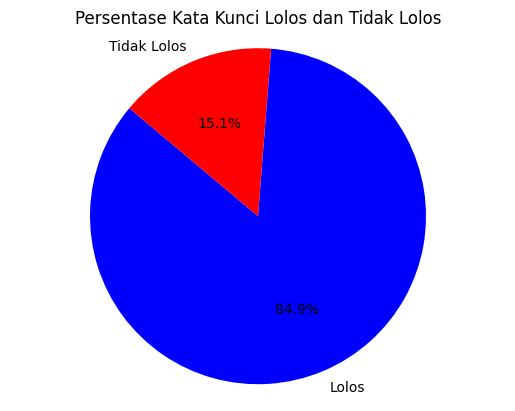

In [37]:
# Pola regex untuk kata kunci yang menunjukkan lolos
kata_kunci_lolos = r'(lolos|ketrima|lulus|diterima|keterima|biru|alhamdulillah)'

# Pola regex untuk kata kunci yang menunjukkan tidak lolos
kata_kunci_tidak_lolos = r'(merah|belum beruntung|menyala abangkuh|merah merona|belum rezeki)'

# Tokenisasi teks
kolom_teks = data["full_text"]  # Ganti "nama_kolom_teks" dengan nama kolom teks dalam dataset Anda
tokens = " ".join(kolom_teks).lower().split()

# Stemming kata dalam tokens
# (Anda perlu implementasi stemming sesuai dengan library atau algoritma yang Anda gunakan)
# Di sini saya akan menggunakan token aslinya untuk kemudahan.
stemmed_tokens = tokens

# Hitung kemunculan kata kunci untuk lolos dan tidak lolos
lolos_count = sum(1 for token in stemmed_tokens if re.match(kata_kunci_lolos, token))
tidak_lolos_count = sum(1 for token in stemmed_tokens if re.match(kata_kunci_tidak_lolos, token))

# Visualisasi menggunakan pie chart
labels = ['Lolos', 'Tidak Lolos']
sizes = [lolos_count, tidak_lolos_count]
colors = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Persentase Kata Kunci Lolos dan Tidak Lolos')
plt.show()

In [110]:
# Ambil kolom teks yang ingin Anda analisis
kolom_teks = data["full_text"]  # Ganti "nama_kolom_teks" dengan nama kolom teks dalam dataset Anda

# Gabungkan semua teks menjadi satu teks panjang
teks_panjang = " ".join(kolom_teks)

# Cari kemunculan kata "universitas" diikuti oleh nama universitas
universitas_pattern = r'universitas\s+\w+'
universitas_matches = re.findall(universitas_pattern, teks_panjang.lower())

# Hitung frekuensi kemunculan universitas menggunakan Counter
frekuensi_universitas = Counter(universitas_matches)

# Tampilkan hasil
print(frekuensi_universitas)

Counter({'universitas negeri': 657, 'universitas brawijaya': 113, 'universitas indonesia': 64, 'universitas diponegoro': 29, 'universitas gajah': 23, 'universitas sebelas': 13, 'universitas jendral': 7, 'universitas padjadjaran': 7, 'universitas pendidikan': 7, 'universitas sriwijaya': 3, 'universitas impi': 2, 'universitas hassanudin': 2, 'universitas padjajaran': 1, 'universitas bsi': 1, 'universitas bangka': 1, 'universitas jenderal': 1, 'universitas riau': 1, 'universitas impiann': 1, 'universitas gunadarma': 1, 'universitas source': 1, 'universitas trunojoyo': 1, 'universitas airlangga': 1})


<Figure size 1000x600 with 0 Axes>

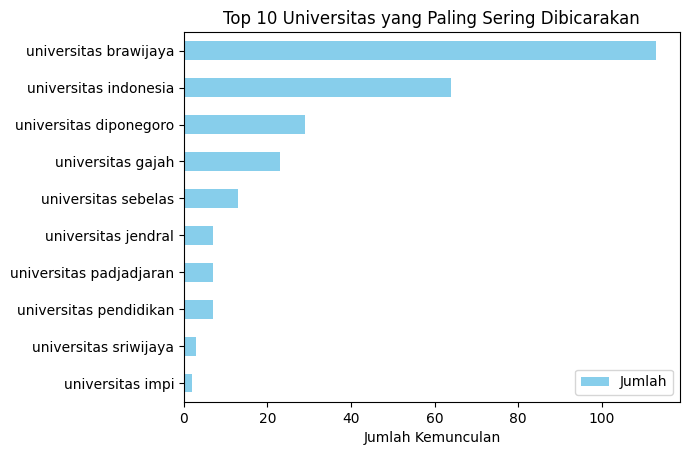

In [111]:
# Konversi Counter menjadi DataFrame
university_counts = pd.DataFrame.from_dict(frekuensi_universitas, orient='index', columns=['Jumlah'])

# Urutkan berdasarkan jumlah kemunculan
university_counts = university_counts.sort_values(by='Jumlah', ascending=False)

# Exlcude yang index ke 0 yaitu universitas negeri
university_counts = university_counts.iloc[1:]

# Ambil top 10 universitas
top_10_universities = university_counts.head(10)

# Buat plot
plt.figure(figsize=(10,6))
top_10_universities.plot(kind='barh', color='skyblue')
plt.xlabel('Jumlah Kemunculan')
plt.title('Top 10 Universitas yang Paling Sering Dibicarakan')
plt.gca().invert_yaxis()  # supaya urutan dari atas ke bawah sesuai urutan di dataframe
plt.show()

## 3.Translate

In [1]:
pip install tra nslate

   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/97.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 97.9/97.9 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/3.8 MB 3.3 MB/s eta 0:00:02
   - -------------------------------------- 0.2/3.8 MB 3.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.3/3.8 MB 2.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.3/3.8 MB 2.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.4/3.8 MB 1.9 MB/s eta 0:00:02
   ------- -------------------------------- 0.7/3.8 MB 2.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.8/3.8 MB 2.5 MB/s eta 0:00:02
   -------- ------------------------------- 0.8/3.8 MB 2.5 MB/s eta 0:00:02
   ---------- ----------------------------- 1.0/3.8 MB 2.5 MB/s eta 0:00:02
   ----------- ----

In [14]:
data = pd.read_csv(r"C:\Users\ZULFIKAR\Downloads\Compressed\Dataset\Data\Data_stemming.csv", encoding='latin1')
data.head()

,full_text
0,simak syarat masuk grup whatsapp
1,welcome tpb fsrd institut teknologi bandung
2,aku bingung bangetttt aku kamukamus snbp ortu ...
3,drop skor utbk lolos akutansi upn veteran yogy...
4,temen temen maaf banget kalau waktu bantu kues...


In [ ]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation
data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv("Data_tranlation.csv")

## Labeling

In [15]:
data = pd.read_csv(r"C:\Users\ZULFIKAR\Downloads\Compressed\Dataset\Data\Dataset_(selesai).csv", index_col=0)
print(data['tweet_english'].tail(20))

1324    cis sorrow to make a Twitter account hit for a...
1325    Only the month is ready ahead of the SNBP UTBK...
1326    WTs Book The King Book The King SNBT UTBK RB M...
1327    fighting can be a book, maa syaa Allah can get...
1328    You want to study through Jakamur Ms. Still Ch...
1329    You want to study through Jakamur Ms. Still Ch...
1330    I want to tell you what a certificate in Malan...
1331    For you to feel the anniversary of the ARCHITE...
1332    For you to feel the anniversary of the ARCHITE...
1333    Hi Brawijayaung Universities I have already wa...
1334    let's join a special workshop for high school ...
1335    Come on, start start now for serious list of S...
1336                  lift class ss just prepare anything
1337    I'm sure I don't go to the Test Test Test List...
1338    Hello for you for you to find a class of teach...
1339    Book Ready Utbk SNBT University of Gajah Mada ...
1340    I sell the Social Wangsit Book of Malang State...
1341    Friend

In [19]:
pip install tweet-preprocessor


Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install textblob


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 406.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ----- ---------------------------------- 81.9/626.3 kB 2.3 MB/s eta 0:00:01
   ----------- ---------------------------- 174.1/626.3 kB 2.6 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/626.3 kB 2.3 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/626.3 kB 2.3 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 542.7/626.3 kB 2.3 MB/s eta 

In [21]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 393.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 901.1 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/301.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install nltk

In [16]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZULFIKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Metode Text Blob

In [17]:
data_tweet = list(data['tweet_english'])
polaritas = 0
status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity
    if analysis.sentiment.polarity >0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')
    total += 1

print(f'Hasil Analysis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data   :{total}')

Hasil Analysis Data:
Positif = 668
Netral = 557
Negatif = 119

Total Data   :1344


In [18]:
data['clasiffied'] = status
data

,full_text,tweet_english,clasiffied
0,simak syarat masuk grup whatsapp,check out whatsapp group entry requirements,Netral
1,welcome tpb fsrd institut teknologi bandung,welcome tpb fsrd institute of technology bandung,Positif
2,aku bingung bangetttt aku kamukamus snbp ortu ...,i'm really confused. I'm a snbp ortu kamukamus...,Negatif
3,drop skor utbk lolos akutansi upn veteran yogy...,drop score to pass the accounting upn veteran ...,Positif
4,temen temen maaf banget kalau waktu bantu kues...,"friends, I'm really sorry if when I helped wit...",Negatif
...,...,...,...
1339,buku siap utbk snbt universitas gajah mada uni...,Book Ready Utbk SNBT University of Gajah Mada ...,Positif
1340,aku jual buku wangsit sosial hukuniversitas ne...,I sell the Social Wangsit Book of Malang State...,Positif
1341,temen temen ken ambis ngerjar nilai rapot buat...,Friends of Ken Ambis chase the report cards fo...,Positif
1342,bismillah tahun depan terima universitas neger...,Bismillah next year receive Jakarta State Univ...,Netral


In [19]:
data.dtypes

full_text        object
tweet_english    object
clasiffied       object
dtype: object

## Visualisasi

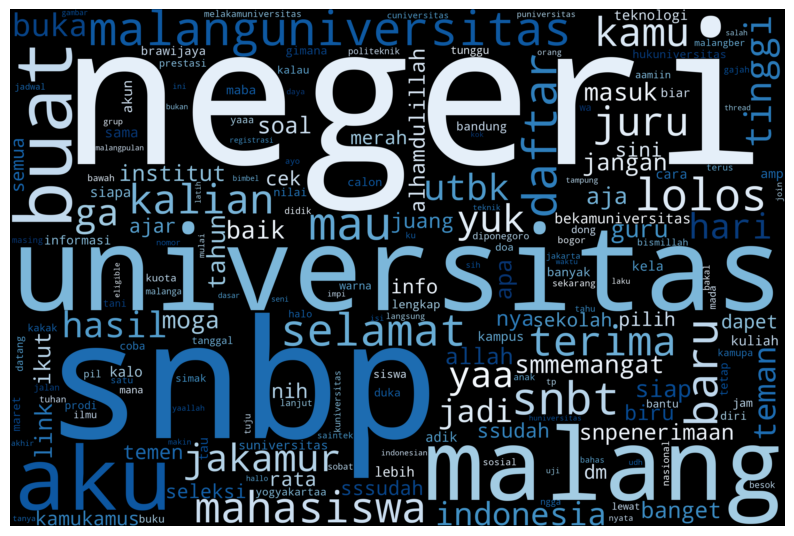

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join(tweets for tweets in data['full_text'])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)


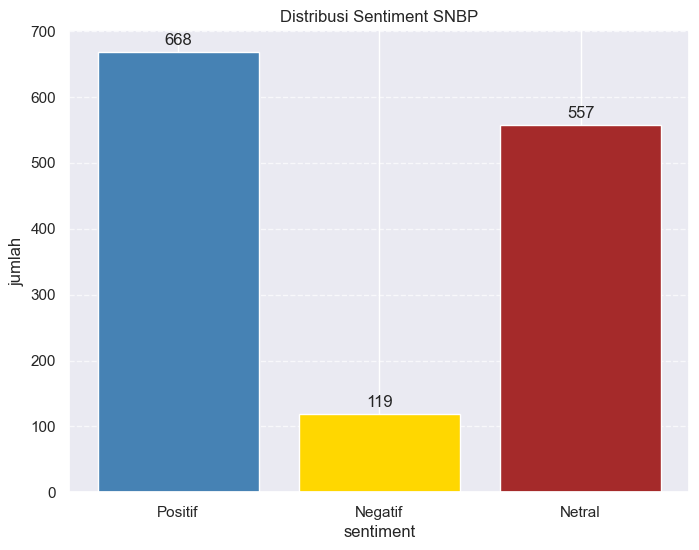

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts  = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['steelblue','gold','brown'])
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('sentiment')
    ax.set_ylabel('jumlah')
    ax.set_title(title)
    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentiment SNBP")


## Klasifikasi Sentiment Naive Bayes Clasiffier

In [22]:
data

,full_text,tweet_english,clasiffied
0,simak syarat masuk grup whatsapp,check out whatsapp group entry requirements,Netral
1,welcome tpb fsrd institut teknologi bandung,welcome tpb fsrd institute of technology bandung,Positif
2,aku bingung bangetttt aku kamukamus snbp ortu ...,i'm really confused. I'm a snbp ortu kamukamus...,Negatif
3,drop skor utbk lolos akutansi upn veteran yogy...,drop score to pass the accounting upn veteran ...,Positif
4,temen temen maaf banget kalau waktu bantu kues...,"friends, I'm really sorry if when I helped wit...",Negatif
...,...,...,...
1339,buku siap utbk snbt universitas gajah mada uni...,Book Ready Utbk SNBT University of Gajah Mada ...,Positif
1340,aku jual buku wangsit sosial hukuniversitas ne...,I sell the Social Wangsit Book of Malang State...,Positif
1341,temen temen ken ambis ngerjar nilai rapot buat...,Friends of Ken Ambis chase the report cards fo...,Positif
1342,bismillah tahun depan terima universitas neger...,Bismillah next year receive Jakarta State Univ...,Netral


In [24]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [27]:
import random
set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
        set_positif.append(n)
    elif(n[1] == 'Negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)
        
set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train= set_positif + set_negatif + set_netral

train_set = []
for n in train:
    train_set.append(n)

In [30]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.8013392857142857


In [32]:
## Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negaitf  =  total_netral = total = 0

for i,tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)
    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1
    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analysis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analysis Data:
Positif = 648
Netral = 670
Negatif = 145

Total Data : 1344


In [33]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

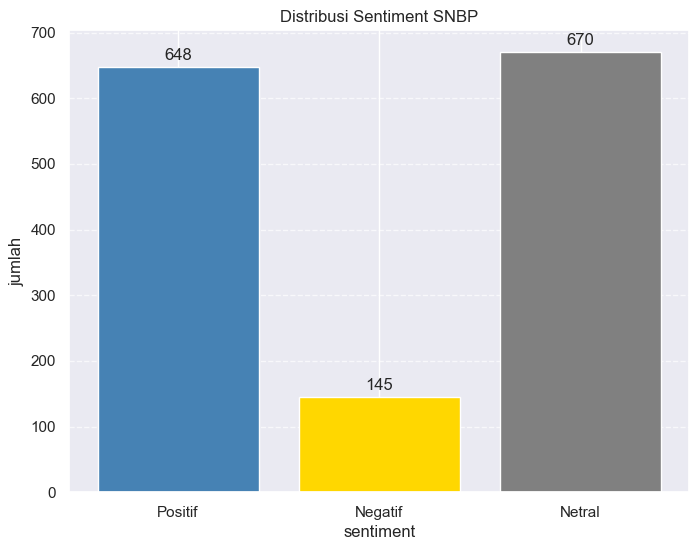

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts  = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['steelblue','gold','gray'])
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('sentiment')
    ax.set_ylabel('jumlah')
    ax.set_title(title)
    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentiment SNBP")


In [37]:
data

,full_text,tweet_english,clasiffied,klasifikasi_bayes
0,simak syarat masuk grup whatsapp,check out whatsapp group entry requirements,Netral,Netral
1,welcome tpb fsrd institut teknologi bandung,welcome tpb fsrd institute of technology bandung,Positif,Netral
2,aku bingung bangetttt aku kamukamus snbp ortu ...,i'm really confused. I'm a snbp ortu kamukamus...,Negatif,Positif
3,drop skor utbk lolos akutansi upn veteran yogy...,drop score to pass the accounting upn veteran ...,Positif,Netral
4,temen temen maaf banget kalau waktu bantu kues...,"friends, I'm really sorry if when I helped wit...",Negatif,Positif
...,...,...,...,...
1339,buku siap utbk snbt universitas gajah mada uni...,Book Ready Utbk SNBT University of Gajah Mada ...,Positif,Positif
1340,aku jual buku wangsit sosial hukuniversitas ne...,I sell the Social Wangsit Book of Malang State...,Positif,Positif
1341,temen temen ken ambis ngerjar nilai rapot buat...,Friends of Ken Ambis chase the report cards fo...,Positif,Positif
1342,bismillah tahun depan terima universitas neger...,Bismillah next year receive Jakarta State Univ...,Netral,Netral


In [39]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClasiffied: {n[2]}\nClassifier Bayes: {n[3]}')
    else:
        print("Tupple tidak memiliki cukup elemen.")
        

Text: welcome tpb fsrd institut teknologi bandung
Clasiffied: Positif
Classifier Bayes: Netral
Text: aku bingung bangetttt aku kamukamus snbp ortu ku ga puniversitas negeri yogyakartaa uang buat ongkos pesawat biaya bulan kost tiap hari aku nang mikirin semua masa depan kayak gimana puniversitas negeri yogyakartaa saran
Clasiffied: Negatif
Classifier Bayes: Positif
Text: drop skor utbk lolos akutansi upn veteran yogyakarta donggg butuh banget buat adekk
Clasiffied: Positif
Classifier Bayes: Netral
Text: temen temen maaf banget kalau waktu bantu kuesioner aku buat tugas kuliah tentu cuniversitas negeri malanga lahir aja kok kok barter drop linknya aja hihii
Clasiffied: Negatif
Classifier Bayes: Positif
Text: late to the party portofolio ku tolak dkv isi yangy hehe mmemang banyak banget minus sih
Clasiffied: Negatif
Classifier Bayes: Positif
Text: starterpack snbt alternatifa naik barusan bangett infoin so buat blm sempet daftar ayo buru daftar takut naik harga banget tanya duka akuu
Cla